# Получение и предобработка данных

In [133]:
import yfinance as yf
import pandas as pd
from tqdm import tqdm
import numpy as np
import lightgbm as lgb
import pickle
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
pd.options.plotting.backend = "plotly"

In [134]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true = np.where(y_true == 0, 1, y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [135]:
def download_dg_data(start_date='2012-01-01', end_date='2024-01-01'):
    tickers = ['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS',
           'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD',
           'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']
    
    index = yf.download("AAPL",start_date, end_date, progress = False)["Adj Close"].index
    full_data = pd.DataFrame(index=index)
    
    for i in tqdm(range(len(tickers))):
        try:
            ticker_data = yf.download(tickers[i], start_date, end_date, progress=False)["Adj Close"].rename(tickers[i])
            full_data = full_data.join(ticker_data, how='outer')
            
        except Exception as e:
            pass
    
    return full_data

In [136]:
data = download_dg_data()
data.to_csv('data2.csv', index=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.45it/s]


In [137]:
data = pd.read_csv('data2.csv')

In [138]:
data = data.dropna(axis=1)

In [139]:
from ipywidgets import IntProgress
from IPython.display import display
import pandas as pd

def generate_lagged_features(data, target_cols, lags, windows, metrics):
    
    result_data = data.copy()
    
    total_iterations = len(target_cols) * len(windows) * len(lags)
    progress = IntProgress(min=0, max=total_iterations, description="Processing")
    display(progress)
    
    new_columns = {}
    
    for target_col in target_cols:
        for window in windows:
            for lag in lags:
                for metric in metrics:  

                    column_name = f"{target_col}_window{window}_lag{lag}_{metric}"
                    
                    if metric == "mean":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).mean()
                    elif metric == "var":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).var()
                    elif metric == "median":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).quantile(0.5)
                    elif metric == "q1":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).quantile(0.25)
                    elif metric == "q3":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).quantile(0.75)
                    elif metric == "percentile_90":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).quantile(0.9)
                    elif metric == "percentile_80":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).quantile(0.8)
                    elif metric == "percentile_20":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).quantile(0.2)
                    elif metric == "percentile_10":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).quantile(0.1)

                progress.value += 1
    
    # Convert the dictionary of new columns to a DataFrame
    new_columns_df = pd.DataFrame(new_columns)
    
    # Concatenate the new DataFrame with the original DataFrame
    result_data = pd.concat([result_data, new_columns_df], axis=1)
    
    progress.close()
    
    return result_data

In [140]:
tickers = data.columns[1:]

full_data = data["Date"].copy()
full_data = pd.DataFrame(full_data)



for ticker in tickers:
    
    proxy = data["Date"].copy()
    proxy = pd.DataFrame(proxy)
    proxy["ticker"] = data[ticker].values
    
    proxy_result_data = generate_lagged_features(proxy, target_cols=["ticker"],
                                                lags=[30,45,60,75,90,180,365],
                                                windows=[1,2,3,4,5,10,20,30,60,90,180,365],
                                               metrics=['mean', 'var', "percentile_90", "percentile_10"])
    if ticker == "AAPL":
        full_data = proxy_result_data.copy()

    else:
        full_data = pd.concat([full_data, proxy_result_data])

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

In [141]:
full_data

,Date,ticker,ticker_window1_lag30_mean,ticker_window1_lag30_var,ticker_window1_lag30_percentile_90,ticker_window1_lag30_percentile_10,ticker_window1_lag45_mean,ticker_window1_lag45_var,ticker_window1_lag45_percentile_90,ticker_window1_lag45_percentile_10,...,ticker_window365_lag90_percentile_90,ticker_window365_lag90_percentile_10,ticker_window365_lag180_mean,ticker_window365_lag180_var,ticker_window365_lag180_percentile_90,ticker_window365_lag180_percentile_10,ticker_window365_lag365_mean,ticker_window365_lag365_var,ticker_window365_lag365_percentile_90,ticker_window365_lag365_percentile_10
0,2012-01-03,12.433824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-04,12.500645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-05,12.639429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-06,12.771559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-09,12.751296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,2023-12-22,52.039433,54.253036,NaN,54.253036,54.253036,53.210476,NaN,53.210476,53.210476,...,51.044503,40.97094,45.393346,8.180304,48.857846,40.97094,45.061483,6.969985,48.154832,40.778909
3014,2023-12-26,51.959702,55.004349,NaN,55.004349,55.004349,52.545219,NaN,52.545219,52.545219,...,51.075506,40.97094,45.396916,8.204671,48.927967,40.97094,45.054149,7.002828,48.154832,40.778909
3015,2023-12-27,52.448040,55.497498,NaN,55.497498,55.497498,53.289906,NaN,53.289906,53.289906,...,51.111123,40.97094,45.401241,8.231710,48.979530,40.97094,45.046624,7.029766,48.154832,40.778909
3016,2023-12-28,52.345058,55.487564,NaN,55.487564,55.487564,54.031288,NaN,54.031288,54.031288,...,51.134209,40.97094,45.405981,8.258303,49.033329,40.97094,45.038458,7.058549,48.154832,40.778909


In [142]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# Определите индексы столбцов для преобразования (все, кроме первого)
columns_to_transform = full_data.columns[1:]

# Примените трансформацию Бокса-Кокса к каждому из выбранных столбцов
transformed_data = full_data.copy()

_, lambda_val = boxcox(full_data[full_data.columns[1]].values)

transformed_data = full_data.copy()
for col in columns_to_transform:
    transformed_data[col] = boxcox(full_data[col], lmbda=lambda_val)

In [143]:
with open('lambda_val.pkl', 'wb') as f:
    pickle.dump(lambda_val, f)

In [122]:
from sklearn.preprocessing import MinMaxScaler

# Инициализация MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 2))

# Обучение MinMaxScaler на столбце 1
scaler.fit(transformed_data["ticker"].values.reshape(-1, 1))

transformed_data_b = full_data.copy()

for col in columns_to_transform:
    transformed_data_b[col] = scaler.transform(transformed_data[col].values.reshape(-1, 1))


In [123]:
full_data = transformed_data_b.copy()

In [124]:
#Добавляем дни недели
full_data['Date'] = pd.to_datetime(full_data['Date'])
full_data.loc[:, 'day_of_week'] = full_data['Date'].dt.day_name()
full_data = pd.get_dummies(full_data,columns=["day_of_week"],drop_first=True)

In [125]:
#Удаляем полностью пустые столбцы (так как окно 1, не может быть дисперсии и инф. персентиля)
columns_to_drop = ['ticker_window1_lag30_var', 'ticker_window1_lag45_var', 'ticker_window1_lag60_var', 'ticker_window1_lag75_var', 'ticker_window1_lag90_var', 'ticker_window1_lag180_var', 'ticker_window1_lag365_var', 'ticker_window1_lag30_percentile_90', 'ticker_window1_lag45_percentile_90', 'ticker_window1_lag60_percentile_90', 'ticker_window1_lag75_percentile_90', 'ticker_window1_lag90_percentile_90', 'ticker_window1_lag180_percentile_90', 'ticker_window1_lag365_percentile_90', 'ticker_window1_lag30_percentile_10', 'ticker_window1_lag45_percentile_10', 'ticker_window1_lag60_percentile_10', 'ticker_window1_lag75_percentile_10', 'ticker_window1_lag90_percentile_10', 'ticker_window1_lag180_percentile_10', 'ticker_window1_lag365_percentile_10'] 
full_data = full_data.drop(columns=columns_to_drop)

In [126]:
horizon = 30
#Если ставим больше 30, то нужно менять сгенерированные значения, lag должен быть >= horizon

In [127]:
full_data = full_data.dropna()

In [128]:
all_dates = full_data["Date"].copy()
all_dates = pd.DataFrame(all_dates)

dates = full_data["Date"].unique()[-horizon:]
mask = full_data['Date'].isin(dates)

old_dates = all_dates.loc[~mask]
new_dates = all_dates.loc[mask]

X_train = full_data.loc[~mask].drop(columns=["ticker","Date"])
X_test = full_data.loc[mask].drop(columns=["ticker","Date"])
y_train = full_data.loc[~mask].ticker.values
y_test = full_data.loc[mask].ticker.values

y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test = inv_boxcox(y_test, lambda_val)

In [55]:
#X_train = X_train.fillna(-10)
#X_test = X_test.fillna(-10)

In [130]:
X_train

,ticker_window1_lag30_mean,ticker_window1_lag45_mean,ticker_window1_lag60_mean,ticker_window1_lag75_mean,ticker_window1_lag90_mean,ticker_window1_lag180_mean,ticker_window1_lag365_mean,ticker_window2_lag30_mean,ticker_window2_lag30_var,ticker_window2_lag30_percentile_90,...,ticker_window365_lag180_percentile_90,ticker_window365_lag180_percentile_10,ticker_window365_lag365_mean,ticker_window365_lag365_var,ticker_window365_lag365_percentile_90,ticker_window365_lag365_percentile_10,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
729,1.166229,1.175236,1.176732,1.159635,1.153470,1.105344,1.051925,1.167475,-0.093041,1.168468,...,1.116272,1.048980,1.097604,0.874329,1.138856,1.049529,False,False,True,False
730,1.163359,1.173203,1.166676,1.159586,1.155389,1.102788,1.051805,1.164798,-0.052835,1.165943,...,1.116120,1.048980,1.097638,0.873716,1.138856,1.049662,False,False,False,True
731,1.160288,1.164145,1.164739,1.162643,1.161369,1.100206,1.047184,1.161828,-0.035538,1.163054,...,1.115926,1.048980,1.097660,0.873320,1.138856,1.049662,False,False,False,False
732,1.163669,1.170900,1.166747,1.163264,1.160986,1.101098,1.043884,1.161984,-0.005485,1.163333,...,1.115613,1.048980,1.097669,0.873154,1.138856,1.049662,True,False,False,False
733,1.168599,1.169415,1.165307,1.164407,1.162515,1.103111,1.042075,1.166146,0.120788,1.168110,...,1.114992,1.048980,1.097669,0.873154,1.138856,1.049662,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,1.380888,1.382296,1.375859,1.375726,1.373198,1.345046,1.318539,1.380264,-0.050416,1.380763,...,1.356774,1.314256,1.340112,0.822600,1.353640,1.327215,False,True,False,False
2984,1.376894,1.382749,1.370274,1.374829,1.371636,1.345699,1.318823,1.378898,0.333037,1.380491,...,1.356774,1.314256,1.340048,0.824356,1.353640,1.327100,False,False,False,False
2985,1.377156,1.383607,1.373792,1.375988,1.365900,1.343925,1.312750,1.377025,-0.486801,1.377130,...,1.356774,1.314256,1.339966,0.827134,1.353640,1.326928,True,False,False,False
2986,1.375596,1.383878,1.373136,1.375911,1.368117,1.345115,1.316700,1.376377,0.014393,1.377000,...,1.356774,1.314256,1.339894,0.829146,1.353640,1.326438,False,False,True,False


# Обучение моделей и получение предсказаний

In [131]:
import time
import pickle
# Инициализация моделей
GB_model = lgb.LGBMRegressor(n_estimators=1000, max_depth=-1, random_state=42, n_jobs=10, verbose=-1)
RF_model = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=10, verbose=0)

# Измерение времени обучения GB_model
start_time = time.time()
GB_model.fit(X_train, y_train)
training_time_gb = time.time() - start_time

with open('GB_model.pkl', 'wb') as file:
    pickle.dump(GB_model, file)
    
# Измерение времени предсказания GB_model
start_time = time.time()
y_pred_gb = GB_model.predict(X_test)
y_pred_gb = scaler.inverse_transform(y_pred_gb.reshape(-1, 1))
y_pred_gb = inv_boxcox(y_pred_gb, lambda_val)
prediction_time_gb = time.time() - start_time

# Оценка MAPE GB_model
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)

# Измерение времени обучения RF_model
start_time = time.time()
RF_model.fit(X_train, y_train)
training_time_rf = time.time() - start_time

with open('RF_model.pkl', 'wb') as file:
    pickle.dump(RF_model, file)

# Измерение времени предсказания RF_model
start_time = time.time()
y_pred_rf = RF_model.predict(X_test)
y_pred_rf = scaler.inverse_transform(y_pred_rf.reshape(-1, 1))
y_pred_rf = inv_boxcox(y_pred_rf, lambda_val)
prediction_time_rf = time.time() - start_time

# Оценка MAPE RF_model
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

In [132]:
# Создание смешанной модели
alpha = 0.5
y_pred_combined = alpha * y_pred_gb + (1-alpha) * y_pred_rf

# Измерение времени обучения и предсказания Combined_model
start_time = time.time()
# Предположим, что обучение Combined_model включает в себя обучение обеих моделей
training_time_combined = training_time_gb + training_time_rf
# Предположим, что предсказание Combined_model включает в себя предсказание обеих моделей
prediction_time_combined = prediction_time_gb + prediction_time_rf

# Оценка MAPE Combined_model
mape_combined = mean_absolute_percentage_error(y_test, y_pred_combined)

# Создание DataFrame
data = {
    'Модель': ['GB_model', 'RF_model', 'Combined_model'],
    'Время обучения (сек)': [training_time_gb, training_time_rf, training_time_combined],
    'Время предсказания (сек)': [prediction_time_gb, prediction_time_rf, prediction_time_combined],
    'Оценка MAPE': [mape_gb, mape_rf, mape_combined]
}

df = pd.DataFrame(data)

# Вывод DataFrame
print(df)

           Модель  Время обучения (сек)  Время предсказания (сек)  Оценка MAPE
0        GB_model             10.287987                  0.014257     8.532854
1        RF_model             51.222522                  0.000000     7.851789
2  Combined_model             61.510509                  0.014257     8.137924


In [59]:
y_test

array([[23.75453721],
       [23.75386402],
       [23.81287006],
       [23.78576205],
       [23.80819068],
       [23.76327743],
       [23.7572269 ],
       [23.77771407],
       [23.74309383],
       [23.7626049 ],
       [23.80585034],
       [23.74511413],
       [23.87846258],
       [23.8418966 ],
       [23.90661773],
       [23.95411657],
       [23.87049687],
       [23.92115772],
       [24.02784034],
       [24.03273416],
       [24.01510449],
       [23.9600363 ],
       [23.99449315],
       [23.92511899],
       [23.92016637],
       [23.8844324 ],
       [23.8661797 ],
       [23.86950047],
       [23.88376883],
       [23.84888836],
       [26.05435917],
       [25.95924701],
       [25.95818767],
       [25.89097695],
       [25.93804518],
       [25.96109917],
       [25.92955162],
       [25.96268727],
       [25.99122751],
       [26.0711281 ],
       [26.14441896],
       [26.14675735],
       [26.10327462],
       [26.06353278],
       [26.11474941],
       [26

# Лучшая модель

In [ ]:
with open('RF_model.pkl', 'rb') as file:
    RF_model = pickle.load(file)

y_pred = RF_model.predict(X_test)
y_pred = inv_boxcox(y_pred, lambda_value)
mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
test_dates = new_dates.copy()
test_dates.loc[:, "predictions"] = y_test
new_dates.loc[:, "predictions"] = y_pred
old_dates.loc[:, "predictions"] = y_train

sample_test = test_dates.loc[~test_dates['Date'].duplicated(keep='first')]
sample_prediction = new_dates.loc[~new_dates['Date'].duplicated(keep='first')]
sample_train = old_dates.loc[~old_dates['Date'].duplicated(keep='first')]

In [ ]:
# Создаем датафрейм
df_to_plot = pd.DataFrame(index=all_dates[~all_dates['Date'].duplicated(keep='first')]["Date"].values[-horizon-365:])
df_to_plot['last_year'] = np.concatenate([sample_train["predictions"][-365:], np.full(horizon, np.nan)])
df_to_plot['y_true'] = np.concatenate([np.full(365, np.nan), sample_test["predictions"]])
df_to_plot['y_predicted'] = np.concatenate([np.full(365, np.nan), sample_prediction["predictions"]])
df_to_plot.plot()

In [ ]:
def plot_feature_importance(model, X , num = 20):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set_style("darkgrid")
    sns.mpl.rc("figure", figsize=(15, int(num/4)))
    sns.mpl.rc("font", size=14)

    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                      ascending=False)[0:num])
    plt.title('RF Features importance')
    plt.show()

plot_feature_importance(GB_model, X_train, num = 20)

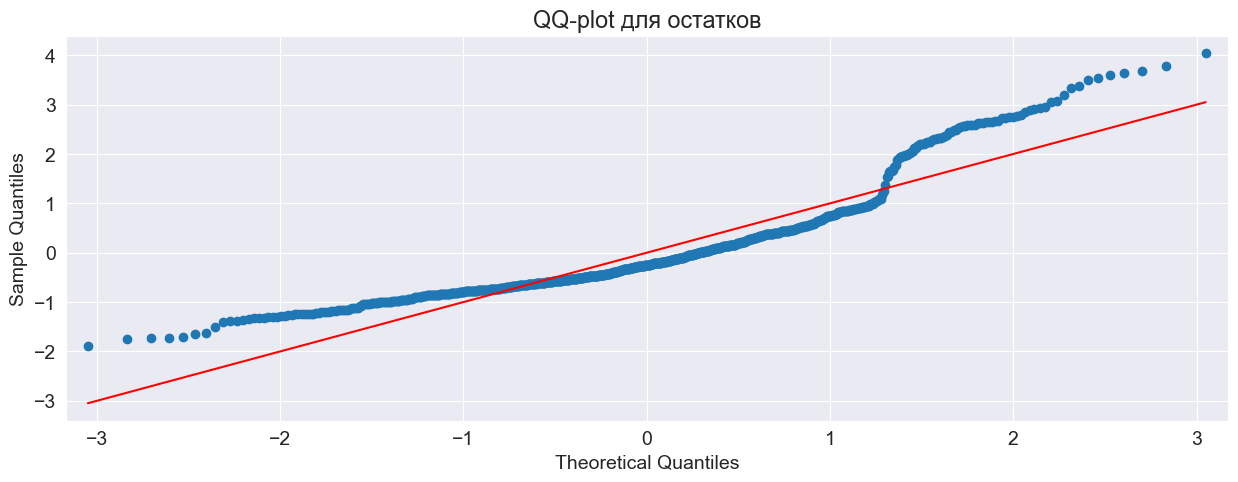

In [162]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
import matplotlib.pyplot as plt
residuals = y_test - y_pred
qqplot(residuals, line='s', fit=True)
plt.title('QQ-plot для остатков')
plt.show()

# Итоговый pipeline (немного условный)

In [257]:
# Main pipeline
def main(ticker):

    # Просто для теста пусть сегодня - это 30 торговых дней до 1 января 2024 года. Чтобы не лезть в будущее
    ticker = ticker
    start_date='2012-01-01'
    end_date='2024-01-01'
    test_data = pd.DataFrame(yf.download(ticker, start_date, end_date, progress=False)["Adj Close"]).reset_index(drop=False)
    test_data= test_data.rename(columns={"Adj Close": "ticker"})
    
    #Уберем последние 30 значения. Их мы будем предсказывать. На них же проверим результат
    y_true = test_data[-30:]["ticker"].copy().values
    test_data.loc[test_data.index[-30:], 'ticker'] = np.nan

    full_data = generate_lagged_features(test_data, target_cols=["ticker"],
                                            lags=[30,45,60,75,90,180,365],
                                            windows=[1,2,3,4,5,10,20,30,60,90,180,365],
                                           metrics=['mean', 'var', "percentile_90", "percentile_10"])

    #Добавляем дни недели
    full_data['Date'] = pd.to_datetime(full_data['Date'])
    full_data.loc[:, 'day_of_week'] = full_data['Date'].dt.day_name()
    full_data = pd.get_dummies(full_data,columns=["day_of_week"],drop_first=True)
    #Удаляем полностью пустые столбцы (так как окно 1, не может быть дисперсии и инф. персентиля)
    columns_to_drop = ['ticker_window1_lag30_var', 'ticker_window1_lag45_var', 'ticker_window1_lag60_var', 
                       'ticker_window1_lag75_var', 'ticker_window1_lag90_var', 'ticker_window1_lag180_var', 
                       'ticker_window1_lag365_var', 'ticker_window1_lag30_percentile_90', 'ticker_window1_lag45_percentile_90', 
                       'ticker_window1_lag60_percentile_90', 'ticker_window1_lag75_percentile_90', 'ticker_window1_lag90_percentile_90', 
                       'ticker_window1_lag180_percentile_90', 'ticker_window1_lag365_percentile_90', 'ticker_window1_lag30_percentile_10', 
                       'ticker_window1_lag45_percentile_10', 'ticker_window1_lag60_percentile_10', 'ticker_window1_lag75_percentile_10', 
                       'ticker_window1_lag90_percentile_10', 'ticker_window1_lag180_percentile_10', 'ticker_window1_lag365_percentile_10'] 
    full_data = full_data.drop(columns=columns_to_drop)

    X = full_data[-30:].drop(columns=["ticker","Date"])

    with open('RF_model.pkl', 'rb') as file:
        loaded_RF_model = pickle.load(file)

    with open('lambda_value.pkl', 'rb') as file:
        loaded_lambda_value = pickle.load(file)
    
    # Прогноз с использованием pipeline
    forecast = loaded_RF_model.predict(X)
    y_pred = inv_boxcox(forecast, loaded_lambda_value)
    MAPE = mean_absolute_percentage_error(y_true, y_pred)

    return y_true, y_pred, MAPE

In [258]:
y_true, y_pred, MAPE = main("AAPL")
print("Предсказания: ", y_pred)
print("Реальные значения: ", y_true)
print("Оценка MAPE: ", MAPE)

IntProgress(value=0, description='Processing', max=84)

Предсказания:  [184.97003887 182.67861454 181.89571421 181.50878217 182.02784817
 181.79785421 181.45303486 182.02469171 181.79013542 182.02171853
 182.05608222 182.75733572 182.03130889 181.35950804 182.35234912
 181.9687344  182.51192395 182.65169262 181.72482461 181.71057304
 180.76393631 180.22026671 180.55641253 180.69352754 180.51954675
 180.22190004 189.70493599 191.70749246 195.08301977 195.2206323 ]
Реальные значения:  [189.46824646 189.44825745 191.20600891 190.39704895 191.06619263
 189.72790527 189.54812622 190.15734863 189.12866211 189.70791626
 190.99629211 189.18858337 193.17350769 192.07492065 194.02243042
 195.46058655 192.93380737 194.46186829 197.7077179  197.85752869
 197.31822205 195.64035034 196.68902588 194.58171082 194.43188477
 193.35328674 192.8039856  192.90383911 193.33329773 192.28463745]
Оценка MAPE:  5.038539049980053
